# Task 1 less_than_k

In [51]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.circuit.library import QFT
import numpy as np

This method is completed by referring to this paper https://arxiv.org/pdf/2303.07120.pdf and adding my thoughts

The creative idea I came up with is that we employ the Quantum Fourier Transform (QFT) and its inverse transform to achieve conditional phase rotation, which is a more advanced way to achieve less than comparison. In this way, we are able to add phases to represent all possible states smaller than k, and then map these phases back to measurable qubit states via inverse QFT.

In [56]:
def less_than_k(k, list_n):
    # Calculate the number of qubits required
    max_val = max(max(list_n), k)
    n_qubits = max_val.bit_length()  # The number of qubits required is determined by the maximum

    # initial
    qr = QuantumRegister(n_qubits, 'q')
    cr = ClassicalRegister(n_qubits, 'c')
    qc = QuantumCircuit(qr, cr)

    # Superposition state
    qc.h(qr)

    # Apply quantum Fourier transform
    qc.append(QFT(n_qubits, do_swaps=False), qr)

    # Construct and apply conditions less than k
    for i in range(n_qubits):
        # If the i-th bit of k is 1, apply conditional phase rotation to all lower bits
        if k & (1 << i):
            for j in range(i):
                qc.cp(-2 * np.pi / (2 ** (i - j + 1)), qr[j], qr[i])

    # inverse
   
    qc.append(QFT(n_qubits, do_swaps=False).inverse(), qr)
    qc.measure(qr, cr)

    # Execute quantumcircuit
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    results = job.result().get_counts(qc)

    # find the results and find numbers less than k
    less_than_k_list = []
    for bin_str, count in results.items():
        val = int(bin_str, 2)
        if val < k and val in list_n:
            less_than_k_list.append(val)

    return less_than_k_list



In [57]:
# Test
A = less_than_k(7, [4, 9, 11, 14, 1, 13, 6, 15])
print(A)

[1, 4, 6]


/var/folders/kh/vvf0y3ls11586918v2761md40000gn/T/ipykernel_3196/4091039521.py:31: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, backend, shots=1024)


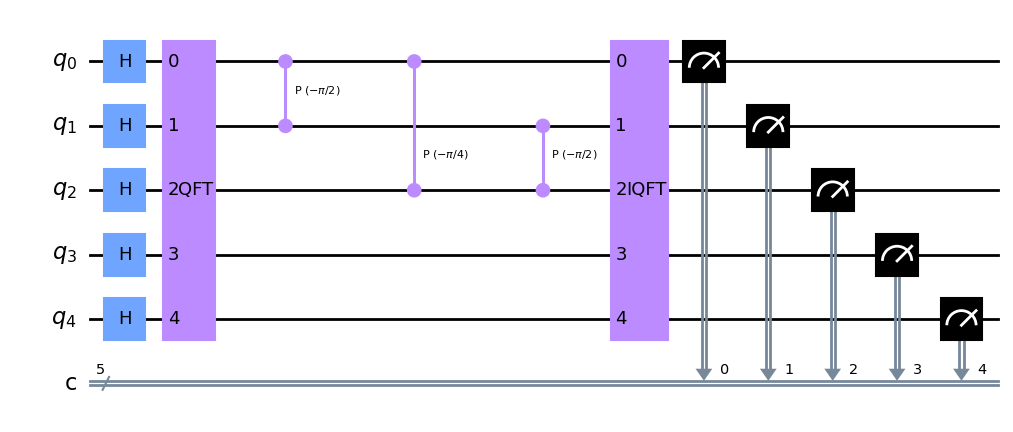

In [59]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

def less_than_k(k, list_n):
    # 计算所需的量子位数量
    max_val = max(max(list_n), k)
    n_qubits = max_val.bit_length()  # 所需的量子位数量由最大值决定

    # 初始化量子寄存器和经典寄存器
    qr = QuantumRegister(n_qubits, 'q')
    cr = ClassicalRegister(n_qubits, 'c')
    qc = QuantumCircuit(qr, cr)

    # 初始化量子位状态为叠加态，以表示所有可能的数字
    qc.h(qr)
    qc.append(QFT(n_qubits, do_swaps=False), qr)
    # 应用量子傅立叶变换
    

    # 构建并应用小于k的条件
    for i in range(n_qubits):
        # 如果k的第i位是1，则对所有更低位应用条件相位旋转
        if k & (1 << i):
            for j in range(i):
                qc.cp(-2 * np.pi / (2 ** (i - j + 1)), qr[j], qr[i])

    # 应用量子傅立叶变换的逆变换
    qc.append(QFT(n_qubits, do_swaps=False).inverse(), qr)

    # 测量所有量子位
    qc.measure(qr, cr)

    return qc

# 创建电路实例
qc = less_than_k(7, [4, 9, 11, 14, 1, 13, 6, 16])

# 绘制量子电路
qc.draw('mpl')
